In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
1# Lấy tên tệp đã tải lên
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    break

# Hiển thị 5 dòng đầu tiên
if df is not None:
    print("5 dòng đầu tiên:")
    print(df.head())

    # Hiển thị thống kê mô tả
    print("\nThống kê mô tả dữ liệu:")
    print(df.describe())

Saving winequality-red.csv to winequality-red.csv
5 dòng đầu tiên:
  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                               

Saving winequality-red.csv to winequality-red (2).csv
5 dòng đầu tiên:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  qua

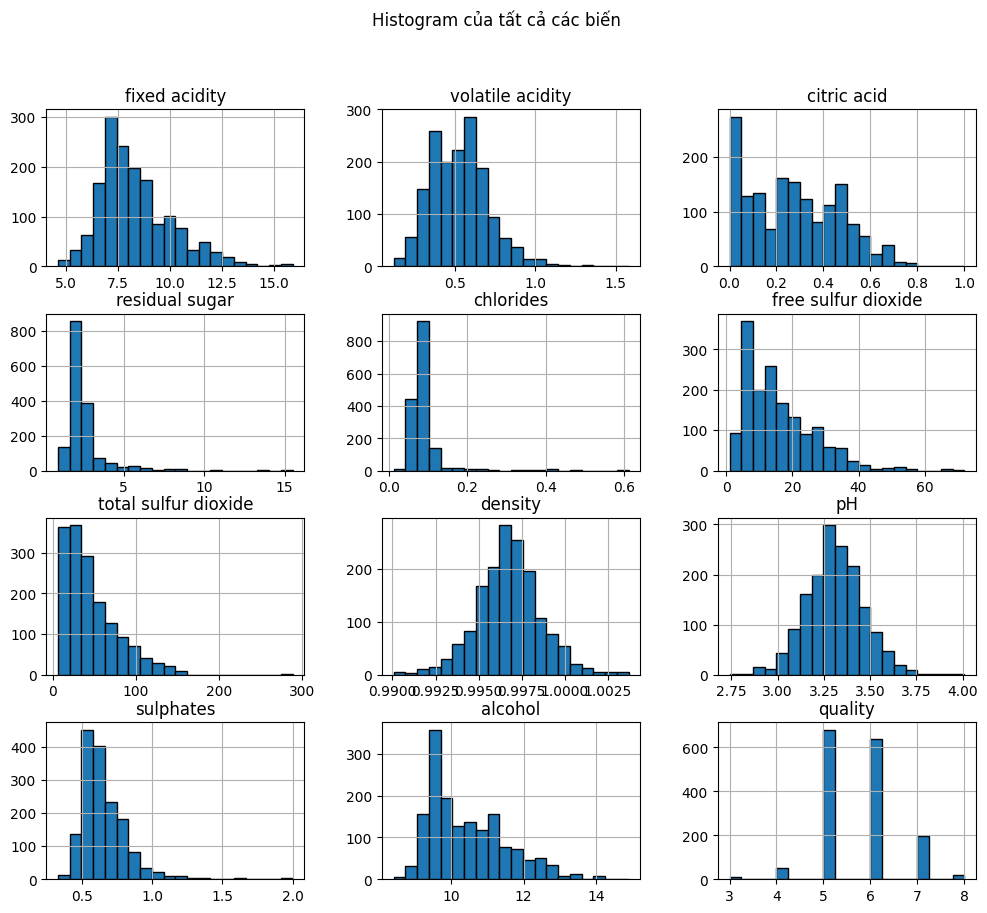

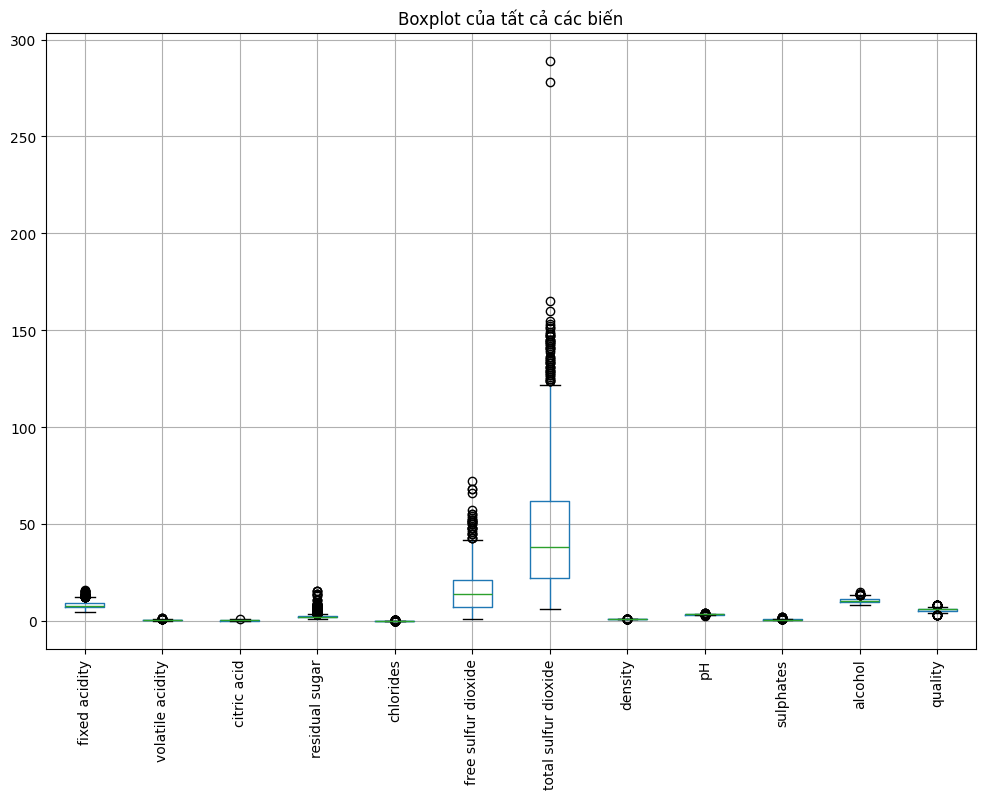

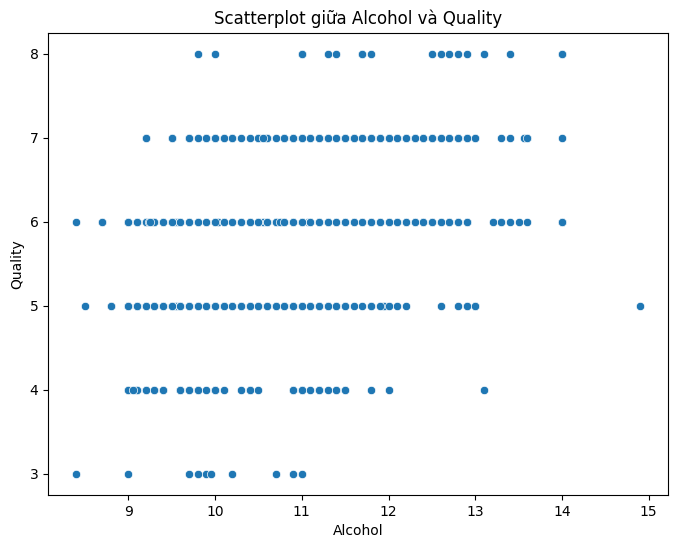

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Tải tệp lên từ máy tính
uploaded = files.upload()

# Lấy tên tệp đã tải lên
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break

# Loại bỏ dấu ngoặc kép trong tên cột
if df is not None:
    df.columns = [col.replace('"', '') for col in df.columns]

    # Chuyển đổi các cột sang kiểu số nếu có thể
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Hiển thị 5 dòng đầu tiên
    print("5 dòng đầu tiên:")
    print(df.head())


    print("\nThống kê mô tả dữ liệu:")
    print(df.describe())

  # 2.1 Kiểm tra giá trị thiếu
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.DataFrame({'Số lượng': missing_values, 'Phần trăm': missing_percentage})
    print("\nKiểm tra giá trị thiếu:")
    print(missing_data)

  # 2.2 Vẽ histogram cho tất cả các biến
    df.dropna().hist(figsize=(12, 10), bins=20, edgecolor='black')
    plt.suptitle('Histogram của tất cả các biến')
    plt.show()

  # 2.3 Vẽ boxplot cho tất cả các biến
    plt.figure(figsize=(12, 8))
    df.dropna().boxplot(rot=90)
    plt.title('Boxplot của tất cả các biến')
    plt.show()

  # 2.4 Vẽ Scatterplot cho "alcohol" và "quality"
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['alcohol'], y=df['quality'])
    plt.title('Scatterplot giữa Alcohol và Quality')
    plt.xlabel('Alcohol')
    plt.ylabel('Quality')
    plt.show()


Saving winequality-red.csv to winequality-red (3).csv


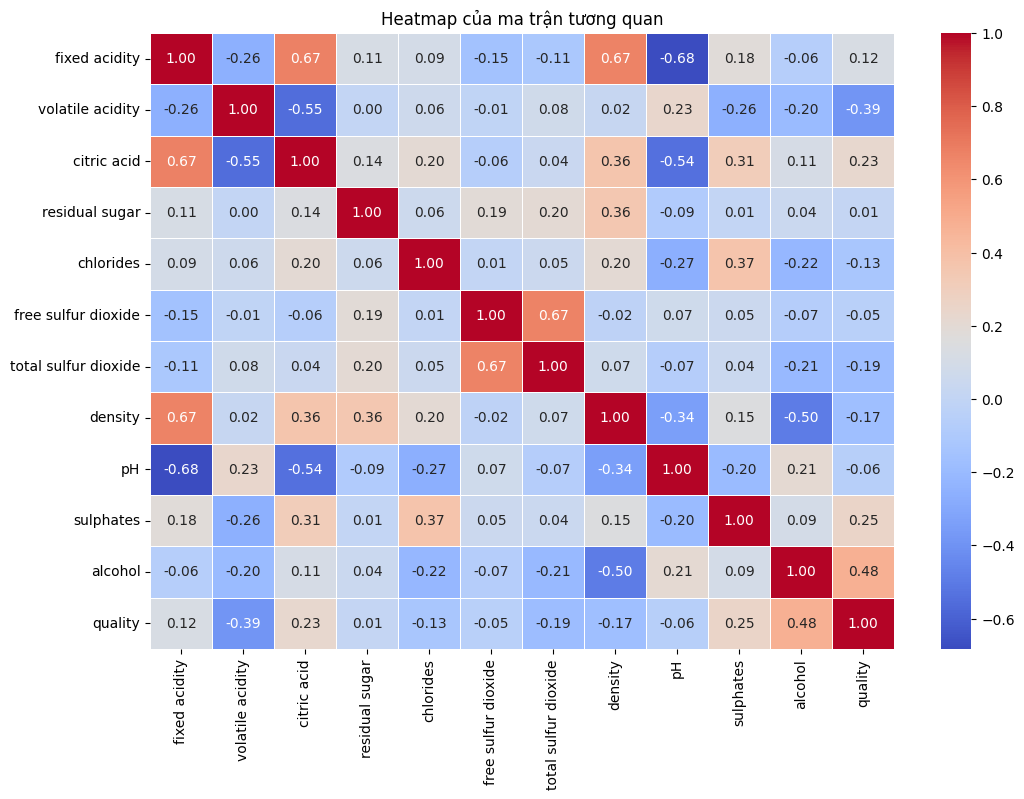

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break
df.columns = [col.replace('"', '') for col in df.columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# 3. Tính toán ma trận tương quan và vẽ heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap của ma trận tương quan')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
uploaded = files.upload()
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break

df.columns = [col.replace('"', '') for col in df.columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Chia tập dữ liệu thủ công
# 4.1 Xáo trộn dữ liệu
np.random.seed(42)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
# 4.2 Chia dữ liệu với test size = int(0.2 * len(df))
test_size = int(0.2 * len(df))
train_data = df_shuffled[:-test_size]
test_data = df_shuffled[-test_size:]
# 4.3 Tách dữ liệu
print(f"Số mẫu trong tập huấn luyện: {len(train_data)}")
print(f"Số mẫu trong tập kiểm tra: {len(test_data)}")
# 4.4 Tách đặc trưng và nhãn
X_train = train_data.drop(columns=['quality'])
y_train = train_data['quality']
X_test = test_data.drop(columns=['quality'])
y_test = test_data['quality']
print("Tập huấn luyện (X_train) kích thước:", X_train.shape)
print("Tập kiểm tra (X_test) kích thước:", X_test.shape)


Saving winequality-red.csv to winequality-red (9).csv
Số mẫu trong tập huấn luyện: 1280
Số mẫu trong tập kiểm tra: 319
Tập huấn luyện (X_train) kích thước: (1280, 11)
Tập kiểm tra (X_test) kích thước: (319, 11)


In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
uploaded = files.upload()
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break
df.columns = [col.replace('"', '') for col in df.columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Chuẩn bị dữ liệu
# 5.1 Khởi tạo bộ dữ liệu chuẩn hóa
scaler = StandardScaler()
scaler.fit(df.drop(columns=['quality']))
# 5.2 Chuẩn hóa tập huấn luyện
X_train_scaled = scaler.transform(df.drop(columns=['quality']))
# 5.3 Chuẩn hóa tập kiểm tra
y_train = df['quality']
print("Dữ liệu sau chuẩn hóa:", X_train_scaled.shape)
print("Nhãn dữ liệu:", y_train.shape)

Saving winequality-red.csv to winequality-red (5).csv
Dữ liệu sau chuẩn hóa: (1599, 11)
Nhãn dữ liệu: (1599,)


In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
uploaded = files.upload()
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break
df.columns = [col.replace('"', '') for col in df.columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
scaler = StandardScaler()
scaler.fit(df.drop(columns=['quality']))
X_scaled = scaler.transform(df.drop(columns=['quality']))
y = df['quality']

# 6 Ứng dụng mô hình hồi quy tuyến tính
# 6.1 Khởi tạo
model = LinearRegression()
# 6.2 Huấn luyện
model.fit(X_scaled, y)
# 6.3 Dự đoán trên tập kiểm tra
y_pred = model.predict(X_scaled)
print("Dự đoán trên tập kiểm tra:", y_pred[:5])


Saving winequality-red.csv to winequality-red (6).csv
Dự đoán trên tập kiểm tra: [5.03285045 5.13787975 5.20989474 5.69385794 5.03285045]


In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
uploaded = files.upload()
df = None
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')
    break
df.columns = [col.replace('"', '') for col in df.columns]
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
scaler = StandardScaler()
scaler.fit(df.drop(columns=['quality']))
X_scaled = scaler.transform(df.drop(columns=['quality']))
y = df['quality']
model = LinearRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
# 7. Đánh giá mô hình
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Saving winequality-red.csv to winequality-red (7).csv
Mean Squared Error (MSE): 0.416767167221408
R^2 Score: 0.3605517030386882


In [4]:
## bài tập về nhà
#Cho bộ dư liệu howlongwelive
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip().str.lower()
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}, Số cột: {num_cols}")


Saving howlongwelive.csv to howlongwelive (1).csv
Số hàng: 2938, Số cột: 22


In [5]:
## tên các côt
print("Danh sách tên cột:", df.columns.tolist())


Danh sách tên cột: ['country', 'year', 'status', 'life expectancy', 'adult mortality', 'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years', 'thinness 5-9 years', 'income composition of resources', 'schooling']


In [7]:
## truy cập cột statur
if "status" in df.columns:
    status_column = df["status"]

In [8]:
## đếm các nước đang phát triển và phát triển
if status_column is not None:
    developing_count = (df["status"] == "Developing").sum()
    developed_count = (df["status"] == "Developed").sum()
    print(f"Số nước đang phát triển: {developing_count}")
    print(f"Số nước phát triển: {developed_count}")


Số nước đang phát triển: 2426
Số nước phát triển: 512


In [9]:
# tính min max...4
if "alcohol" in df.columns:
    alcohol_min = df["alcohol"].min()
    alcohol_max = df["alcohol"].max()
    alcohol_mean = df["alcohol"].mean()
    alcohol_median = df["alcohol"].median()
    print(f"Alcohol - Min: {alcohol_min}, Max: {alcohol_max}, Mean: {alcohol_mean}, Median: {alcohol_median}")

Alcohol - Min: 0.01, Max: 17.87, Mean: 4.602860787172012, Median: 3.755


In [11]:
### bài 1 đếm những hàng rượu
if "alcohol" in df.columns and "country" in df.columns:
    alcohol_mean = df["alcohol"].mean()
    high_alcohol_df = df[df["alcohol"] > alcohol_mean]
    high_alcohol_count = high_alcohol_df.shape[0]
    unique_countries = high_alcohol_df["country"].unique().tolist()

    print(f"Số hàng có lượng rượu cao hơn mức trung bình: {high_alcohol_count}")
    print("Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:")
    print(unique_countries)

Số hàng có lượng rượu cao hơn mức trung bình: 1171
Danh sách các quốc gia có mức tiêu thụ rượu cao hơn trung bình:
['Albania', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', "Lao People's Democratic Republic", 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Namibia', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Rwanda', 'Saint 

In [12]:
### bài 2 lấy danh sách quốc gia có trình độ học vấn cao hơn mức trung bình và GDP cao hơn mức trung bình
if "schooling" in df.columns and "gdp" in df.columns and "country" in df.columns:
    schooling_mean = df["schooling"].mean()
    gdp_mean = df["gdp"].mean()

    high_edu_gdp_df = df[(df["schooling"] > schooling_mean) & (df["gdp"] > gdp_mean)]
    unique_countries_high_edu_gdp = high_edu_gdp_df["country"].unique().tolist()

    print("Danh sách các quốc gia có trình độ học vấn và GDP cao hơn mức trung bình:")
    print(unique_countries_high_edu_gdp)

Danh sách các quốc gia có trình độ học vấn và GDP cao hơn mức trung bình:
['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Seychelles', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Turkey', 'United Arab Emirates', 'Uruguay']
